<a href="https://colab.research.google.com/github/sbbzplt/QiskitFallFest_IZTECH/blob/master/Grovers_search_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from qiskit import *

### Task 1
Implement Grover's algorithm with 2 qubits to find the answer $|10>$.

You can use the same diffusion operator. You need to create a new oracle to mark state 10.

### Solution

In [ ]:
def new_oracle():
    qc = QuantumCircuit(3)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(1)
    return qc

In [ ]:
def inversion_about_average():
    """Apply inversion about the average step of Grover's algorithm."""
    circuit = QuantumCircuit(3)
    for i in range(2):
        circuit.h(i)
    for i in range(2):
        circuit.x(i)
    circuit.h(1)
    circuit.cx(0, 1)
    circuit.h(1)
    for i in range(2):
        circuit.x(i)
    for i in range(2):
        circuit.h(i)
    return circuit

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\qiskit\circuit\quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


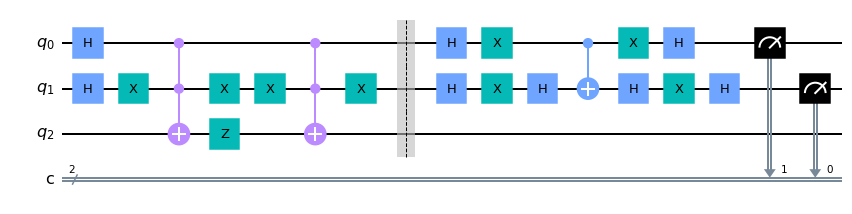

In [ ]:
groverCircuit = QuantumCircuit(3,2)
for i in range(2):
    groverCircuit.h(i)

#query phase
groverCircuit += new_oracle()
groverCircuit.z(2)
groverCircuit += new_oracle().inverse()

groverCircuit.barrier()

#inversion phase
groverCircuit += inversion_about_average()

#measure in reverse order
for i in range(2):    
    groverCircuit.measure(i,1-i)

groverCircuit.draw(output="mpl")

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print(answer)

{'10': 1024}
